In [126]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 


In [172]:
df = pd.read_csv('dataset_alpha_betha.csv')

In [173]:
df

,autoID,SeniorCity,Partner,Dependents,Service1,Service2,Security,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,Charges,Demand,Class
0,7590-VHVEG,0,Yes,No,No,No phone service,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Alpha
1,5575-GNVDE,0,No,No,Yes,No,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.5,Alpha
2,3668-QPYBK,0,No,No,Yes,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Betha
3,7795-CFOCW,0,No,No,No,No phone service,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,Alpha
4,9237-HQITU,0,No,No,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Betha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,Alpha
7039,2234-XADUH,0,Yes,Yes,Yes,Yes,No,Yes,Yes,No,One year,Yes,Credit card (automatic),103.20,7362.9,Alpha
7040,4801-JZAZL,0,Yes,Yes,No,No phone service,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,Alpha
7041,8361-LTMKD,1,Yes,No,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Betha


## Random Forest 

In [150]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

df = df.drop(columns=['autoID'])

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


X = df.drop(columns=['Class'])
y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[['Charges', 'Demand']] = scaler.fit_transform(X_train[['Charges', 'Demand']])
X_test_scaled[['Charges', 'Demand']] = scaler.transform(X_test[['Charges', 'Demand']])

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)



print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy Score:\n", accuracy)

# joblib.dump(model, 'trained_model.pkl')

# with open('metrics.txt', 'w') as f:
#     f.write(f'Classification Report:\n{report}\n')
#     f.write(f'Confusion Matrix:\n{conf_matrix}\n')
#     f.write(f'\nModel Used: RandomForestClassifier\n')
#     f.write(f'Number of Training Samples: {len(X_train)}\n')
#     f.write(f'Number of Test Samples: {len(X_test)}\n')



Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.86      1036
           1       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
 [[938  98]
 [197 176]]
Accuracy Score:
 0.7906316536550745


# Gradient Boosting

Gradient Boosting - Confusion Matrix:
 [[932 104]
 [175 198]]

Gradient Boosting - Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.66      0.53      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Gradient Boosting - Accuracy Score: 0.8019872249822569


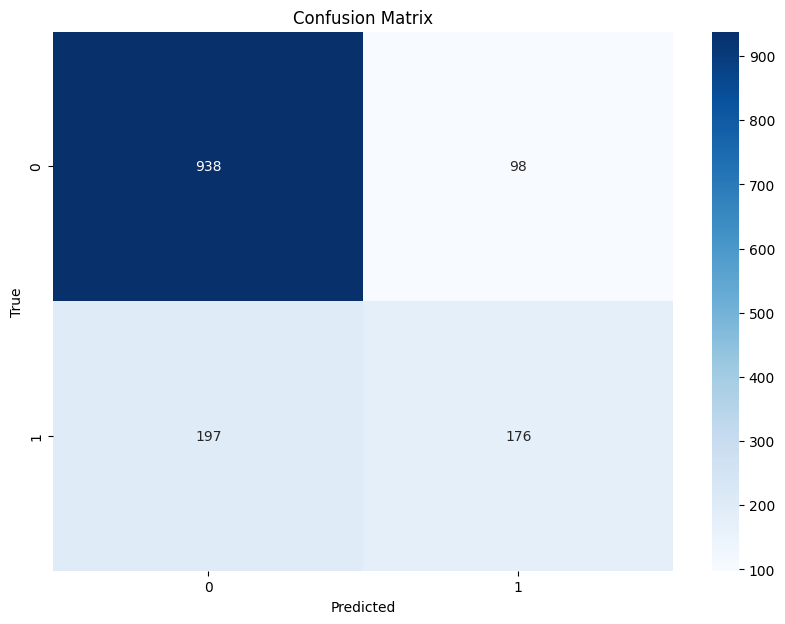

In [157]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

gb_model = GradientBoostingClassifier(random_state=42)


gb_model.fit(X_train, y_train)


y_pred_gb = gb_model.predict(X_test)


print("Gradient Boosting - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\nGradient Boosting - Classification Report:\n", classification_report(y_test, y_pred_gb))
print("\nGradient Boosting - Accuracy Score:", accuracy_score(y_test, y_pred_gb))

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [155]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gb = {
  'n_estimators': [100, 200, 300],
  'max_depth': [3, 5, 7],
  'learning_rate': [0.01, 0.1, 0.2],
  'subsample': [0.8, 1.0]
}


grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid_gb, cv=3, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train, y_train)


best_gb_model = grid_search_gb.best_estimator_


y_pred_best_gb = best_gb_model.predict(X_test)


print("Best Gradient Boosting - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_gb))
print("\nBest Gradient Boosting - Classification Report:\n", classification_report(y_test, y_pred_best_gb))
print("\nBest Gradient Boosting - Accuracy Score:", accuracy_score(y_test, y_pred_best_gb))

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   2.1

## Gradient Boosting con Clasificador (Ajuste)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy Score: 0.7927117841930904
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87      1539
           1       0.67      0.47      0.55       574

    accuracy                           0.79      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113

Confusion Matrix:
 [[1408  131]
 [ 307  267]]


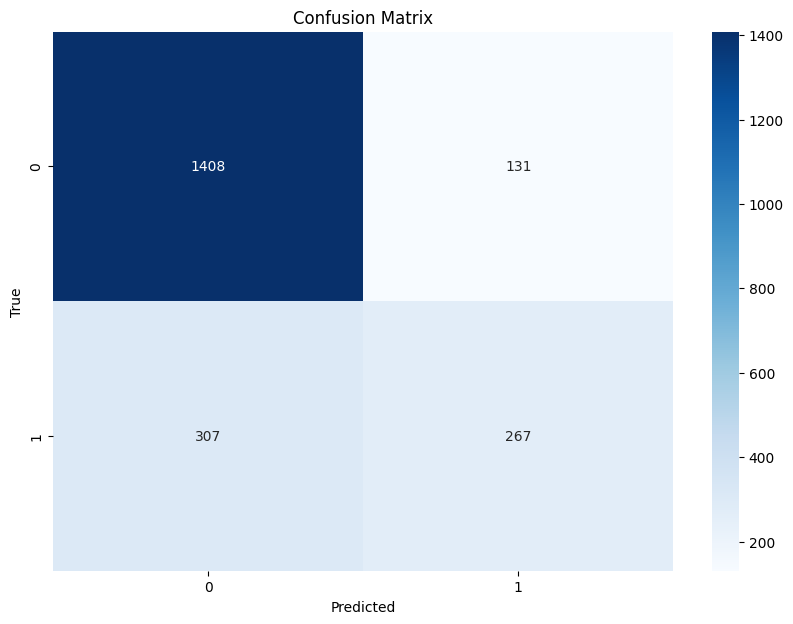

In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset_alpha_betha.csv')

df = df.drop(columns=['autoID'])

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[['Charges', 'Demand']] = scaler.fit_transform(X_train[['Charges', 'Demand']])
X_test_scaled[['Charges', 'Demand']] = scaler.transform(X_test[['Charges', 'Demand']])

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

best_model = GradientBoostingClassifier(**best_params, random_state=42)
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy Score:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()




Dado que estás clasificando órdenes de compra según clase y es importante minimizar los errores de clasificación tanto como sea posible, el modelo sin ajustar parece ser ligeramente mejor en términos de recall y F1-Score para la clase 1, que podría ser crucial para detectar correctamente las órdenes de compra de alta prioridad.

El Gradient Boosting sin ajustar es preferible debido a su mejor balance entre precisión y recall para la clase 1. Aunque el modelo ajustado tiene un mejor rendimiento en términos de precisión global y recall para la clase 0, el modelo sin ajustar ofrece un mejor equilibrio para la clase 1, que parece ser más crítica en este contexto.

## Predicciones sobre la nueva Base

Gradient Boosting - Confusion Matrix:
 [[932 104]
 [175 198]]

Gradient Boosting - Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.66      0.53      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Gradient Boosting - Accuracy Score: 0.8019872249822569


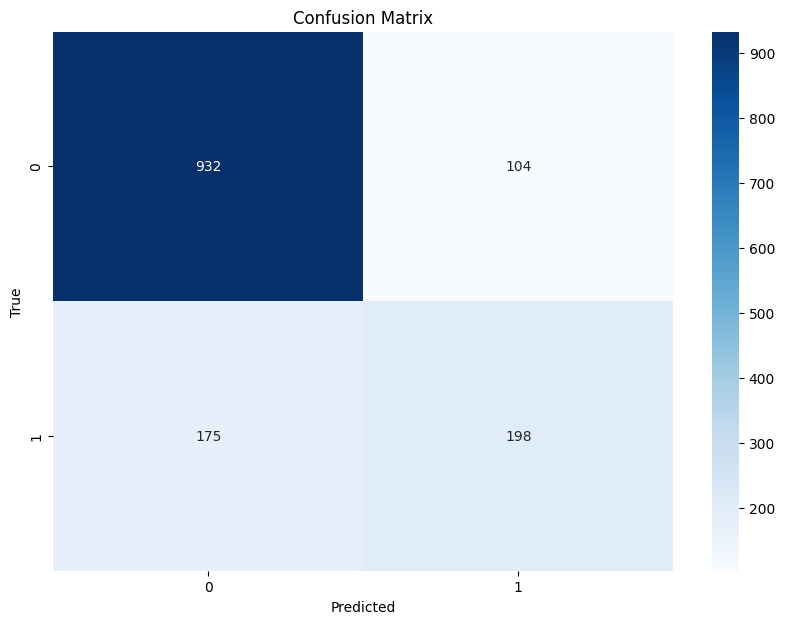

Predicciones:
    SeniorCity  Partner  Dependents  Service1  Service2  Security  \
0           0        0           0         0         0         1   
1           0        0           0         0         0         1   
2           0        0           0         0         0         0   

   OnlineBackup  DeviceProtection  TechSupport  Contract  PaperlessBilling  \
0             0                 0            0         0                 1   
1             0                 0            2         0                 0   
2             1                 1            1         1                 0   

   PaymentMethod  Charges  Demand  Class  
0              1    96.05    1043      1  
1              2    53.45    1132      0  
2              0    19.70    1386      0  


In [176]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset_alpha_betha.csv')

df = df.drop(columns=['autoID'])

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[['Charges']] = scaler.fit_transform(X_train[['Charges']])
X_test_scaled[['Charges']] = scaler.transform(X_test[['Charges']])

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

y_pred_gb = gb_model.predict(X_test_scaled)
print("Gradient Boosting - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\nGradient Boosting - Classification Report:\n", classification_report(y_test, y_pred_gb))
print("\nGradient Boosting - Accuracy Score:", accuracy_score(y_test, y_pred_gb))

conf_matrix = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

to_predict = pd.read_csv('to_predict.csv')
to_predict = to_predict.drop(columns=['autoID'])

to_predict['Demand'] = to_predict['Demand'].round(0).astype(int)
 
label_encoders = {}
for column in to_predict.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    to_predict[column] = le.fit_transform(to_predict[column])
    label_encoders[column] = le

X_to_predict = to_predict.drop(columns=['Class'])
X_to_predict[['Charges']] = scaler.transform(X_to_predict[['Charges']])

y_pred_new = gb_model.predict(X_to_predict)

to_predict['Class'] = y_pred_new


to_predict.to_csv('predicted_to_predict.csv', index=False)

print("Predicciones:\n", to_predict)


## Con descodificación Mapeada

Mapping de etiquetas:
Alpha: 0
Betha: 1
Gradient Boosting - Confusion Matrix:
 [[932 104]
 [175 198]]

Gradient Boosting - Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.66      0.53      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Gradient Boosting - Accuracy Score: 0.8019872249822569


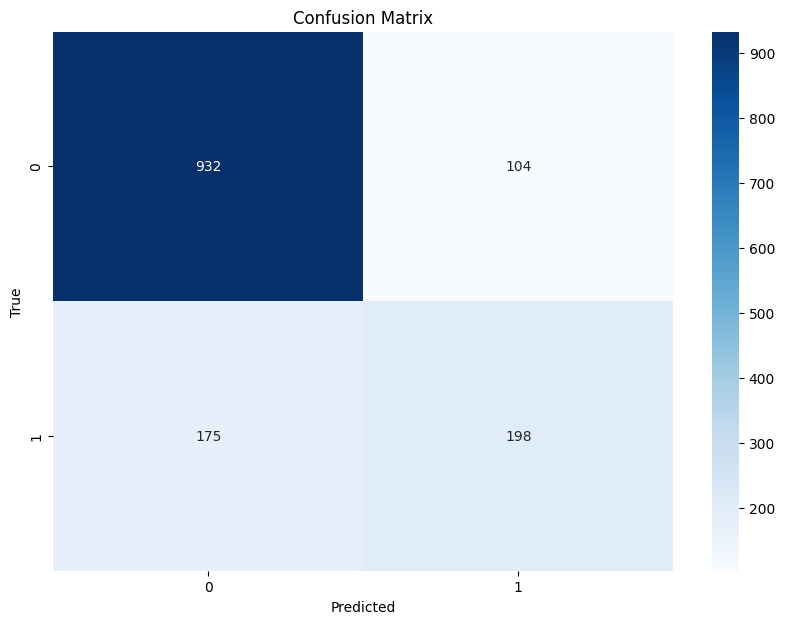

Predicciones:
    SeniorCity Partner Dependents Service1 Service2             Security  \
0           0      No         No      Yes       No  No internet service   
1           0      No         No      Yes       No  No internet service   
2           0      No         No      Yes       No                  Yes   

  OnlineBackup DeviceProtection          TechSupport        Contract  \
0           No               No                   No  Month-to-month   
1           No               No  No internet service  Month-to-month   
2          Yes              Yes                  Yes        Two year   

  PaperlessBilling              PaymentMethod  Charges  Demand  Class  
0              Yes  Bank transfer (automatic)    96.05    1043  Betha  
1               No    Credit card (automatic)    53.45    1132  Alpha  
2               No           Electronic check    19.70    1386  Alpha  


In [187]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset_alpha_betha.csv')

df = df.drop(columns=['autoID'])

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

class_encoder = LabelEncoder()
df['Class'] = class_encoder.fit_transform(df['Class'])

mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping de etiquetas:")
for key, value in mapping.items():
    print(f"{key}: {value}")

X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[['Charges']] = scaler.fit_transform(X_train[['Charges']])
X_test_scaled[['Charges']] = scaler.transform(X_test[['Charges']])

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

y_pred_gb = gb_model.predict(X_test_scaled)
print("Gradient Boosting - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\nGradient Boosting - Classification Report:\n", classification_report(y_test, y_pred_gb))
print("\nGradient Boosting - Accuracy Score:", accuracy_score(y_test, y_pred_gb))

conf_matrix = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_encoder.classes_, yticklabels=class_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

to_predict = pd.read_csv('to_predict.csv')
to_predict = to_predict.drop(columns=['autoID'])

to_predict['Demand'] = to_predict['Demand'].round(0).astype(int)

for column in to_predict.select_dtypes(include=['object']).columns:
    if column in label_encoders:
        to_predict[column] = label_encoders[column].transform(to_predict[column])

X_to_predict = to_predict.drop(columns=['Class'], errors='ignore')
X_to_predict[['Charges']] = scaler.transform(X_to_predict[['Charges']])

y_pred_new = gb_model.predict(X_to_predict)


to_predict['Class'] = y_pred_new


mappings = {
    'Partner': {0: 'No', 1: 'Yes'},
    'Dependents': {0: 'No', 1: 'Yes'},
    'Service1': {0: 'No', 1: 'Yes'},
    'Service2': {0: 'No', 1: 'Yes'},
    'Security': {0: 'No', 1: 'Yes', 2: 'No internet service'},
    'OnlineBackup': {0: 'No', 1: 'Yes', 2: 'No internet service'},
    'DeviceProtection': {0: 'No', 1: 'Yes', 2: 'No internet service'},
    'TechSupport': {0: 'No', 1: 'Yes', 2: 'No internet service'},
    'Contract': {0: 'Month-to-month', 1: 'One year', 2: 'Two year'},
    'PaperlessBilling': {0: 'No', 1: 'Yes'},
    'PaymentMethod': {0: 'Electronic check', 1: 'Mailed check', 2: 'Bank transfer (automatic)', 3: 'Credit card (automatic)'},
    'Class': {0: 'Alpha', 1: 'Betha'}
}

for column, mapping in mappings.items():
    to_predict[column] = to_predict[column].map(mapping) 


to_predict.to_csv('predicted_to_predict.csv', index=False)

print("Predicciones:\n", to_predict)


Se realiza la clasificación con Accuracy de 0.8019